In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
## 분석을 할 데이터를 불러오기
data = pd.read_csv('/Users/jungwon/Documents/학교/포트폴리오/러닝스푼즈데이터분석가_파이썬_포트폴리오_패키지_강의자료_s0jijzp_ibaddLi/파이썬 머신러닝/2-2 실습 파일/data/boston.csv')

In [94]:
# 데이터를 확인할 때에는 상위 5개의 row를 추출하여 보여주는 head()함수를 사용
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 설명
- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- red: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv: 보스턴 506개 타운의 1978년 주택 가격 중앙값(단위 1,000달러)

In [95]:
# 아래 코드는 seaborn, matplotlib으로 시각화를 진행할때 데이터에 한글이 들어있다면 copy&paste 한 뒤 사용하시면 됩니다. 
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정하고, 필요한 라이브러리를 불러들이는 코드입니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False 

# Feature Selection
상관계수와 공분산을 바탕으로 피처를 선택

## 가설1 - 범죄율이 높은 곳의 집값은 낮을까?
일반적인 상식으로는 범죄율이 높다면, 집값은 낮아야 하는 게 사실임. 하지만 데이터를 살펴보았을 때 일반적인 상식과 다른 경우가 나오는 데이터가 있을 수 있으므로 꼭 실제 데이터로 그래프를 그려본 뒤 가설을 확인해보는 것이 중요

In [96]:
#먼저 상관계수와 공분산은 연속형자료를 분석하기 때문에 범주형변수를 제거
del data['chas']

In [97]:
data

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


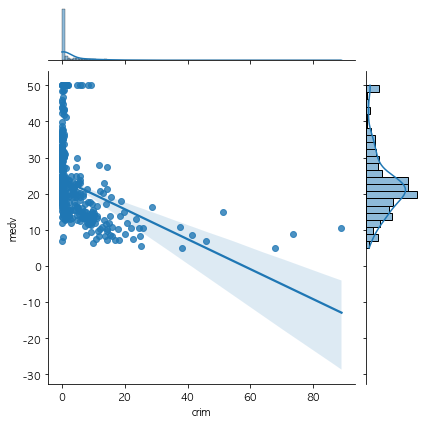

In [98]:
#실제 집값과 범죄율의 상관관계가 있는지 그래프를 통해 살펴보기
sns.jointplot(data=data, x='crim', y='medv', kind='reg')

#### `x.cov(y)`
- 공분산을 확인하기 위한 함수
- x와 y에 같은 시리즈형의 데이터를 대입
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산해줌

In [99]:
#실제 범죄율과 집값의 공분산 확인
data['crim'].cov(data['medv'])

-30.71850796445817

#### `x.corr(y)`
- 상관계수를 확인하기 위한 함수
- x와 y에 같은 시리즈형의 데이터를 대입
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 상관계수를 계산

In [100]:
data['crim'].corr(data['medv'])

-0.3883046085868113

## 가설2 - 방의 개수가 많은 곳이 집값이 비쌀까?

Text(0.5, 1.03, '방의 개수와 집값의 상관관계?')

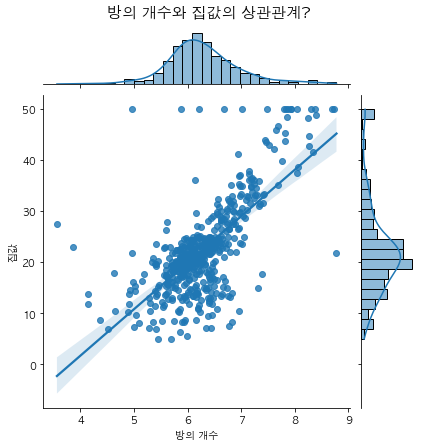

In [101]:
#방의 개수가 늘어날수록 집값도 늘어나지 않을까?
joint = sns.jointplot(data=data, x='rm', y='medv', kind='reg')
joint.set_axis_labels(xlabel='방의 개수', ylabel='집값')
joint.fig.suptitle('방의 개수와 집값의 상관관계?', fontsize = 15, y=1.03)

In [102]:
# 실제 상관계수가 몇인지 확인
data['rm'].corr(data['medv'])

0.6953599470715395

In [103]:
# 위와 같이 공분산 확인
data['rm'].cov(data['medv'])

4.493445879544477

## 가설 3 - 재산세율과 집값의 상관관계

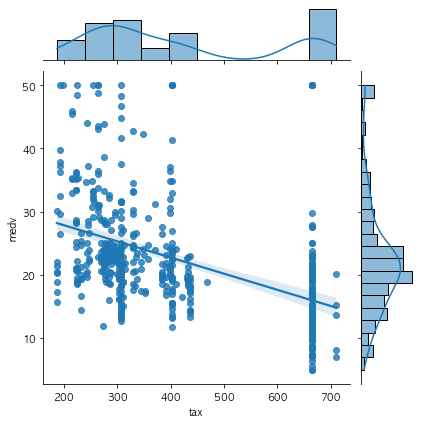

In [104]:
sns.jointplot(data=data, x='tax', y='medv', kind='reg')

In [105]:
#실제 상관계수
data['tax'].corr(data['medv'])

-0.468535933567767

In [106]:
# 공분산
data['tax'].cov(data['medv'])

-726.2557163542441

#### `sns.heatmap(df, cmap, annot, fmt)`
- 앞에서 배운 heatmap의 심화
- cmap - 전체적인 색을 지정(summer/YlGnBu/RdYlGn_r 등)
- annot - True/False로 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소수점 자릿수 설정

<AxesSubplot:>

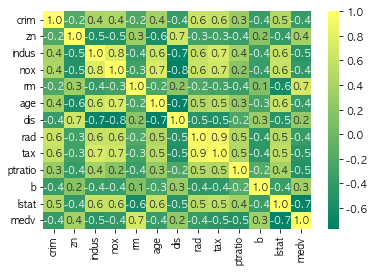

In [107]:
sns.heatmap(data.corr(), cmap='summer', annot = True, fmt = '0.1f')

#### `plt.figure(figsize = (가로, 세로))`
- 도화지의 크기 설정

<AxesSubplot:>

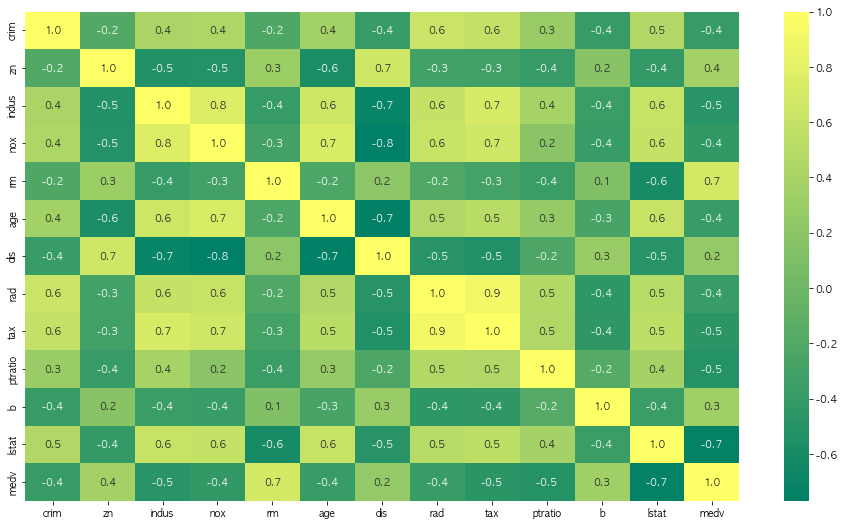

In [108]:
plt.figure(figsize =(16, 9))
sns.heatmap(data.corr(), cmap='summer', annot = True, fmt = '0.1f')

## Feature Extraction
`PCA`를 이용하여 새로운 변수를 만들기

In [109]:
#변수들의 상관계수를 전부 확인하고 몇 개의 변수를 몇 개로 줄일 것인지 확인
corr_bar = []

for column in data.columns:
    print(f"{column}과 medv의 상관관계: {data[column].corr(data['medv'])}\n")
    corr_bar.append((data[column].corr(data['medv'])))


crim과 medv의 상관관계: -0.3883046085868113

zn과 medv의 상관관계: 0.36044534245054277

indus과 medv의 상관관계: -0.4837251600283727

nox과 medv의 상관관계: -0.4273207723732826

rm과 medv의 상관관계: 0.6953599470715395

age과 medv의 상관관계: -0.3769545650045963

dis과 medv의 상관관계: 0.24992873408590388

rad과 medv의 상관관계: -0.38162623063977763

tax과 medv의 상관관계: -0.468535933567767

ptratio과 medv의 상관관계: -0.5077866855375617

b과 medv의 상관관계: 0.33346081965706653

lstat과 medv의 상관관계: -0.7376627261740147

medv과 medv의 상관관계: 1.0



/Users/jungwon/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

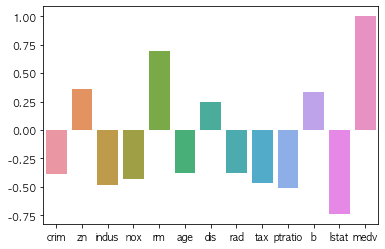

In [110]:
#앞서 배운 barplot을 통하여 그래프를 그리기
sns.barplot(data.columns, corr_bar)

In [111]:
#수치형 데이터 중에 비교적 상관계수가 낮은 두 개의 변수 선택
x = data[['dis', 'b']]

In [112]:
#PCA를 위한 라이브러리 불러오기
from sklearn.decomposition import PCA

`PCA(n_components)`
- n_components: 몇가지의 변수를 만들지 개수를 정함
- 객체를 생성하는 개념

`PCA.fit(x)`
- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

`PCA.components_`
- 앞서 학습한 내용을 바탕으로 만들어진 변수 속에 담긴 이 전 변수의 분산이 담긴 정도

`PCA.explained_variance_ratio_`
- 새로운 변수가 설명하는 분산의 비율

`PCA.transform`
- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [113]:
#2개의 변수를 조합하여 1개의 변수를 만들기
pca = PCA(n_components = 1)

In [114]:
# 데이터 학습
pca.fit(x)

PCA(n_components=1)

In [115]:
x.head()

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


In [116]:
#새로운 변수에 담긴 각 변수의 분산을 확인할 수 있음
pca.components_

array([[-0.00672682, -0.99997737]])

In [117]:
#새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.9995135])

In [118]:
#새로운 변수를 pc1이라는 컬럼에 추가
data['pc1'] = pca.fit_transform(x)

In [119]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


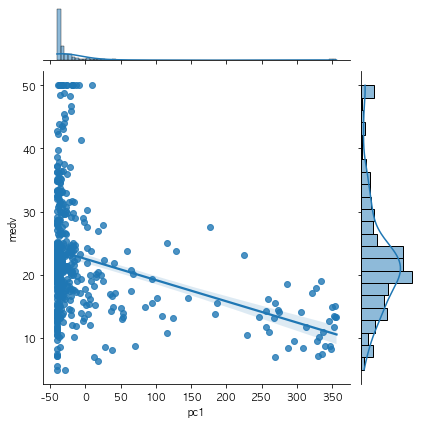

In [120]:
#새로운 변수와 집값의 상관관계를 확인
sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [121]:
#상관계수 확인
data['pc1'].corr(data['medv'])

-0.33348451067418977

# 정규화
`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아보기

`StandardScaler()`
- 정규화 객체 생성

`scaler.fit(x)`
- 정규화 객체로 학습

`scaler.transform(x)`
- 학습된 학습기로 변수 x의 데이터를 변환

In [124]:
#정규화에 필요한 라이브러리
from sklearn.preprocessing import StandardScaler

In [125]:
#정규화 객체 만들기
scaler = StandardScaler()

In [126]:
#x를 학습시킨 후 변형하여 정규화된 x로 만들기
scaler.fit(x)
scaler_x = scaler.transform(x)

### 반복 작업

In [127]:
#PCA의 개수를 찾기
pca = PCA(n_components = 1)
#데이터를 학습
pca.fit(scaler_x)
#새로운 변수에 담긴 각 변수의 분산을 확인
#위와 달라진 분산의 정도를 확인할 수 있음
pca.components_

array([[-0.70710678, -0.70710678]])

In [128]:
#새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.64575584])

In [129]:
#위와 같이 pc1의 컬럼에 데이터를 넣기
data['pc1'] = pca.transform(scaler_x)

In [130]:
data

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-1.073946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0.168701
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0.194870
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0.235206
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0.187533


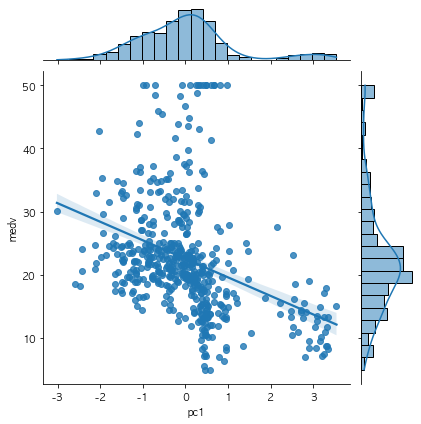

In [131]:
sns.jointplot(data=data, x='pc1', y='medv', kind='reg')

In [132]:
data['pc1'].corr(data['medv'])

-0.3629898510009019

In [133]:
data['b'].corr(data['medv'])

0.33346081965706653